# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SKlearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

#Yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features.pca import PCADecomposition

#Scipy
from scipy.spatial.distance import cdist

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Data

In [2]:
#importing dataset
responsed = pd.read_csv('../data/responses.csv')
#able to read all columns
pd.set_option('display.max_columns', None)

In [3]:
#dropping all NaN values
responsed.dropna(inplace = True)

In [4]:
#backup
responsed_b = responsed.copy()

# Classes

In [16]:
class ClusterKmeans:

    def __init__(self, X):
        self.data = X
    
    def scaler(self, X):
        """
        Method to stardardize the features of a dataset.
        
           Parameters
        ----------
        X : dataframe
        A pandas dataframe
        
            Returns
        -------
        np.array object
        An array object with values standardize
        
        """
        self.X = X
        
        scaler = StandardScaler()
        scalared = scaler.fit_transform(X)
        return scalared

    def plot_elbow(self, scalared):
        """
        A method that plot a elbow graphic showing distortin by k constant.
        
           Parameters
        ----------
        scalared : array
        A numpy array
        
            Returns
        -------
        A elbow plot.
        """
        self.scalared = scalared
        
        model = KMeans()
        visualizer = KElbowVisualizer(model, k=(1,12))
        visualizer.fit(scalared)
        return visualizer.show()
    
    def by_kmeans(self, k, scalared):
        """
        A method to clustering by K-Means.
        
           Parameters
        ----------
        k : int
        Number of clusters
        
            Returns
        -------
        an array
        A array of clusters labels
        """
        self.scalared = scalared
        
        kmeans = KMeans(n_clusters = k)
        scalered_kmeans = kmeans.fit(scalared)
        return scalered_kmeans.labels_

    def plot_scatter(self, scalered, components, label):
        """
        A scatter plot of component one and component two by those labels.
        
           Parameters
        ----------
        scalered : array
        A numpy array
        
        components: int
        A number of components to PCA.
        
        label: array
        An array of labels
        
            Returns
        -------
        a plot
        """
        pca = PCA(components)
        pca.fit(scalered)
        pc1 = pca.transform(scalered)[:,0]
        pc2 = pca.transform(scalered)[:,1]
        plt.scatter(pc1, pc2, c=label, cmap = 'viridis')
    
    def plot_pc(self, scalered, columns, label):
        """
        A plot by labels and those component.
        
           Parameters
        ----------
        scalered : array
        A numpy array
        
        columns: list
        A list of columns name
        
        label: array
        An array of labels
        
            Returns
        -------
        a plot
        """
        
        plt.figure(figsize=(20,15))
        visualizer = PCADecomposition(scale=True, proj_features=True,)
        visualizer.fit_transform(pd.DataFrame(scalered, columns=columns.columns), label)
        visualizer.show()

In [70]:
class ClusterDbscan:
    
    def __init__(self, X):
        self.data = X
        
    def by_dbscan(self, eps, samples, X):
        self.X = X
        clustering = DBSCAN(eps=eps, min_samples=samples).fit(X)
        return clustering.labels_

# Exploratory Data Analysis

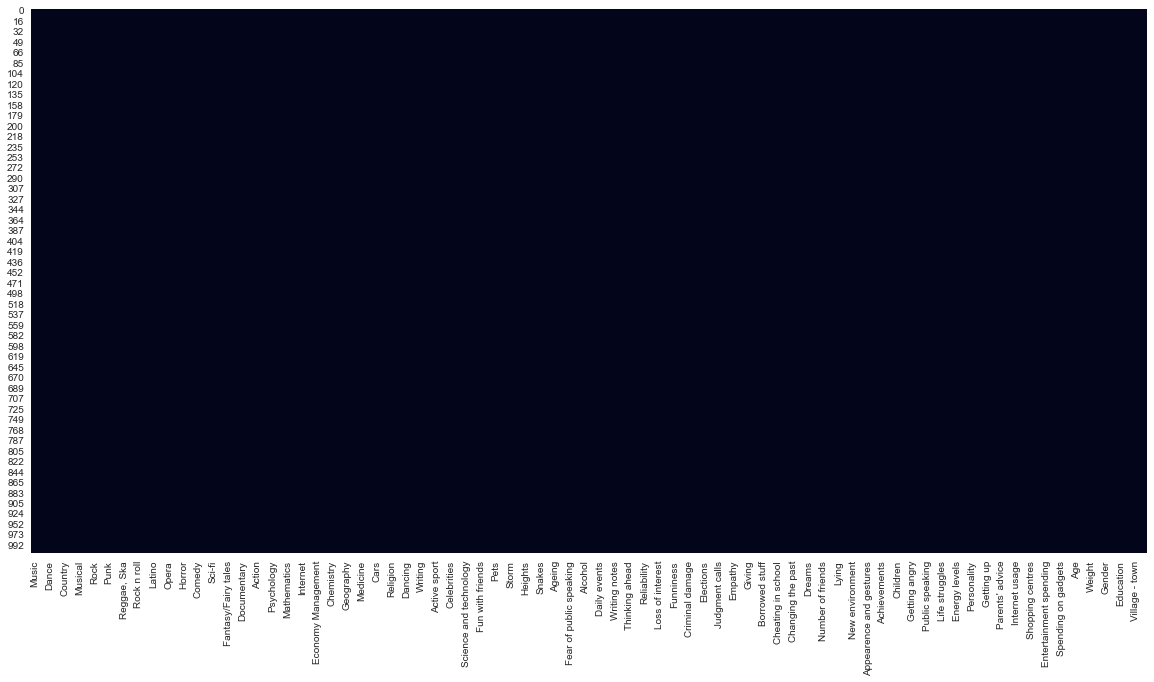

In [7]:
#confirming that doesnt exist nulls and nans
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(responsed.isnull(), cbar=False);

# Clustering by Music

In [7]:
#selecting columns
responsed_music = responsed[['Age', 'Dance','Folk','Country','Classical music','Musical',
 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative',
 'Latino', 'Techno, Trance', 'Opera',]]

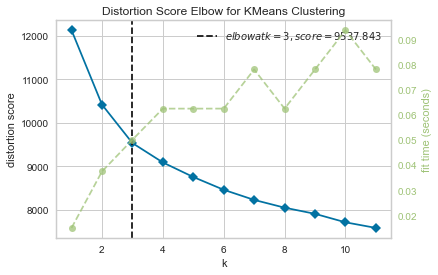

In [8]:
X = ClusterKmeans(responsed_music)
X.scaler(responsed_music)
X.plot_elbow(X.scaler(responsed_music))

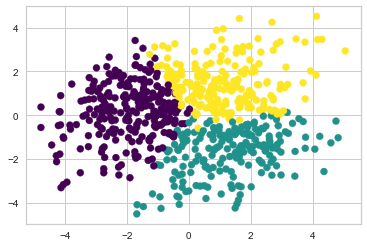

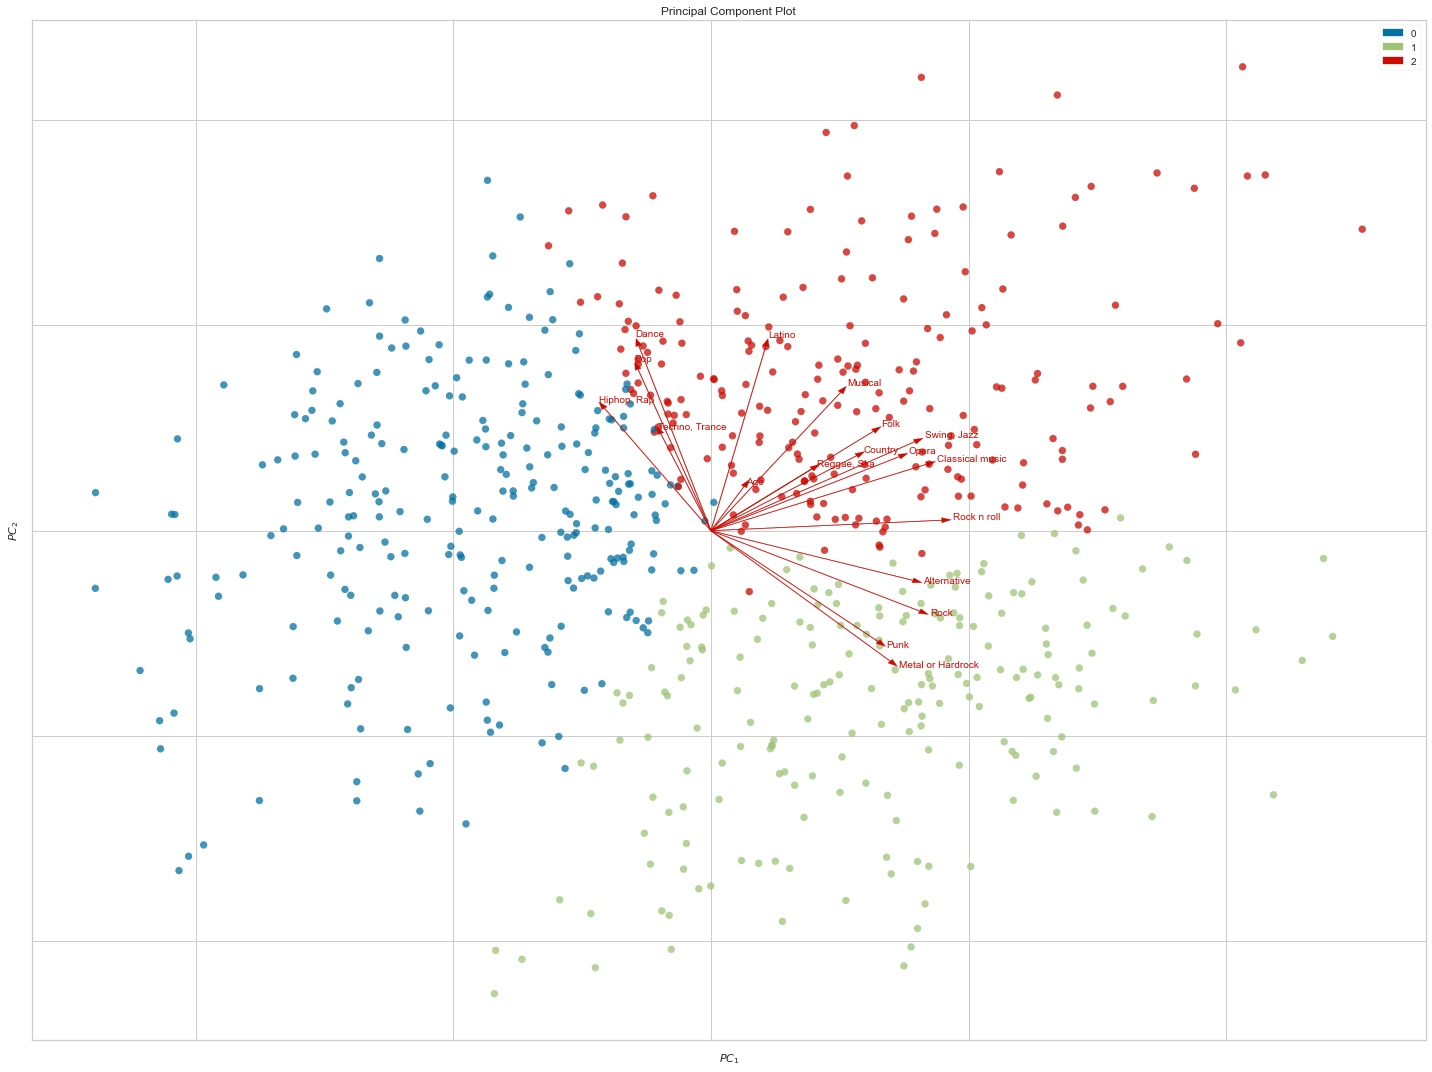

In [11]:
responsed['Label_Music'] = X.by_kmeans(3, X.scaler(responsed_music))
X.plot_scatter(X.scaler(responsed_music), 10, responsed['Label_Music'])
X.plot_pc(X.scaler(responsed_music), responsed_music, responsed['Label_Music'])

## Understanding more about this data

### Opposite age columns

In [12]:
responsed_music_1 = responsed[['Age', 'Dance','Country', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Rock n roll', 'Alternative',
 'Techno, Trance']]

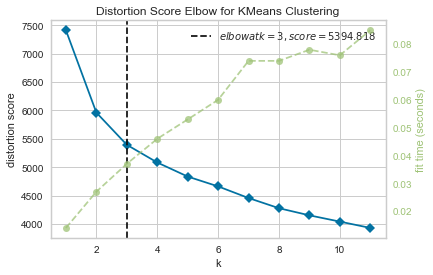

In [13]:
X = ClusterKmeans(responsed_music_1)
X.plot_elbow(X.scaler(responsed_music_1))

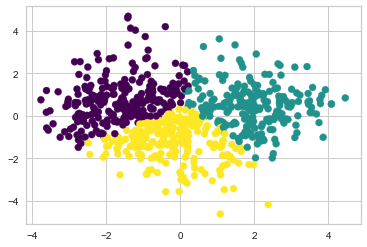

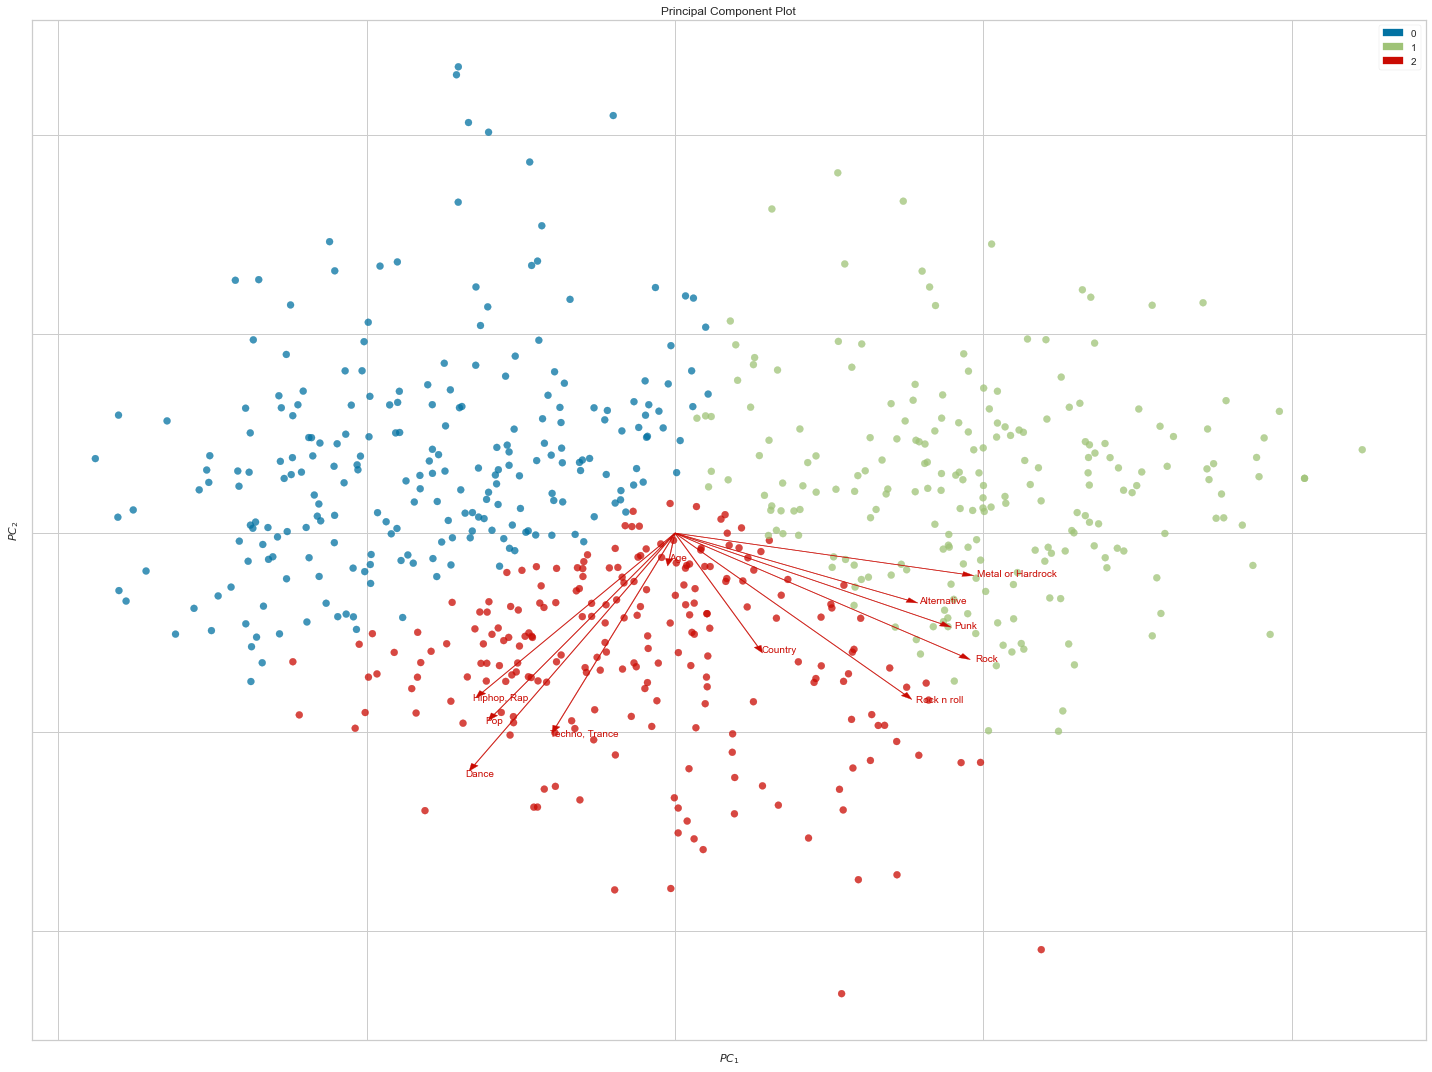

In [15]:
responsed['Label_Music1'] = X.by_kmeans(3, X.scaler(responsed_music_1))
X.plot_scatter(X.scaler(responsed_music_1), 10, responsed['Label_Music1'])
X.plot_pc(X.scaler(responsed_music_1), responsed_music_1, responsed['Label_Music1'])

In [24]:
responsed.groupby(by = 'Label_Music1')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Label_Music1,,,,,,,,
0,236.0,20.470339,2.815453,15.0,19.0,20.0,22.00,30.0
1,218.0,20.110092,2.521208,15.0,19.0,20.0,21.00,30.0
2,220.0,20.468182,2.838722,15.0,19.0,20.0,21.25,30.0


### Columns tending to age

In [16]:
responsed_music_2 = responsed[['Age', 'Folk','Country','Classical music','Musical', 'Opera',]]

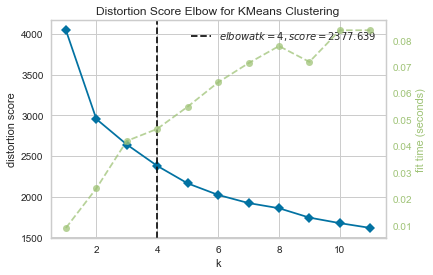

In [17]:
X = ClusterKmeans(responsed_music_2)
X.plot_elbow(X.scaler(responsed_music_2))

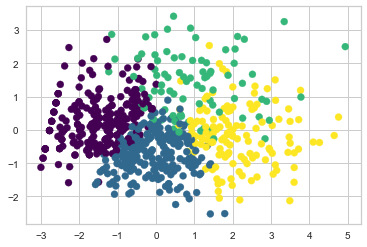

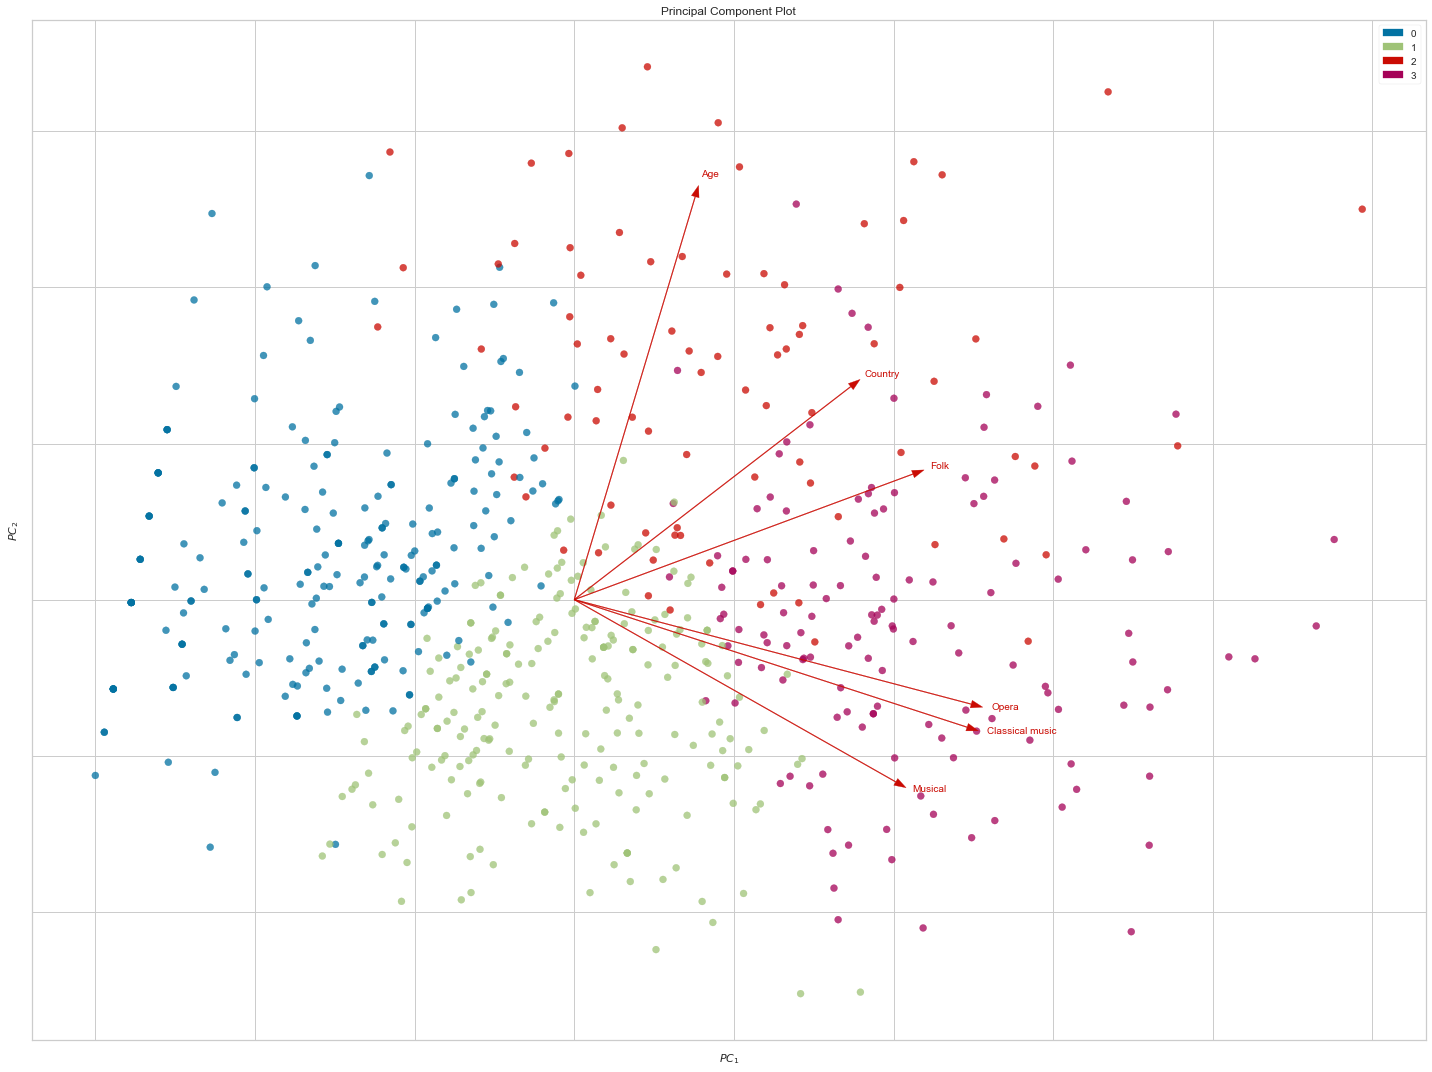

In [19]:
responsed['Label_Music2'] = X.by_kmeans(4, X.scaler(responsed_music_2))
X.plot_scatter(X.scaler(responsed_music_2), 5, responsed['Label_Music2'])
X.plot_pc(X.scaler(responsed_music_2), responsed_music_2, responsed['Label_Music2'])

In [25]:
responsed.groupby(by =  'Label_Music2')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Label_Music2,,,,,,,,
0,232.0,19.913793,2.076748,15.0,19.0,20.0,21.0,28.0
1,224.0,19.169643,1.617663,15.0,18.0,19.0,20.0,23.0
2,83.0,25.530120,2.302371,22.0,24.0,25.0,27.5,30.0
3,135.0,19.888889,1.726296,15.0,19.0,20.0,21.0,25.0


# Clustering by Movies

In [66]:
responsed_movies = responsed[['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales',
 'Animated', 'Documentary', 'Western', 'Action',]]

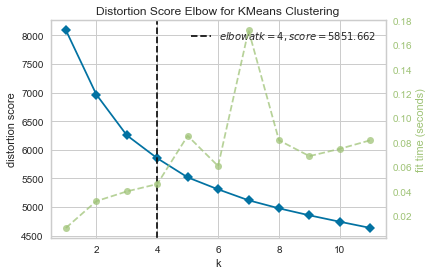

In [282]:
X = ClusterKmeans(responsed_movies)
X.plot_elbow(X.scaler(responsed_movies))

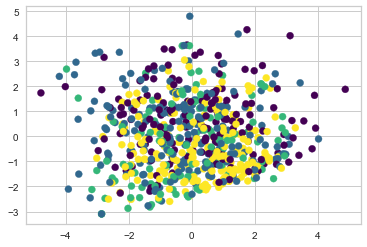

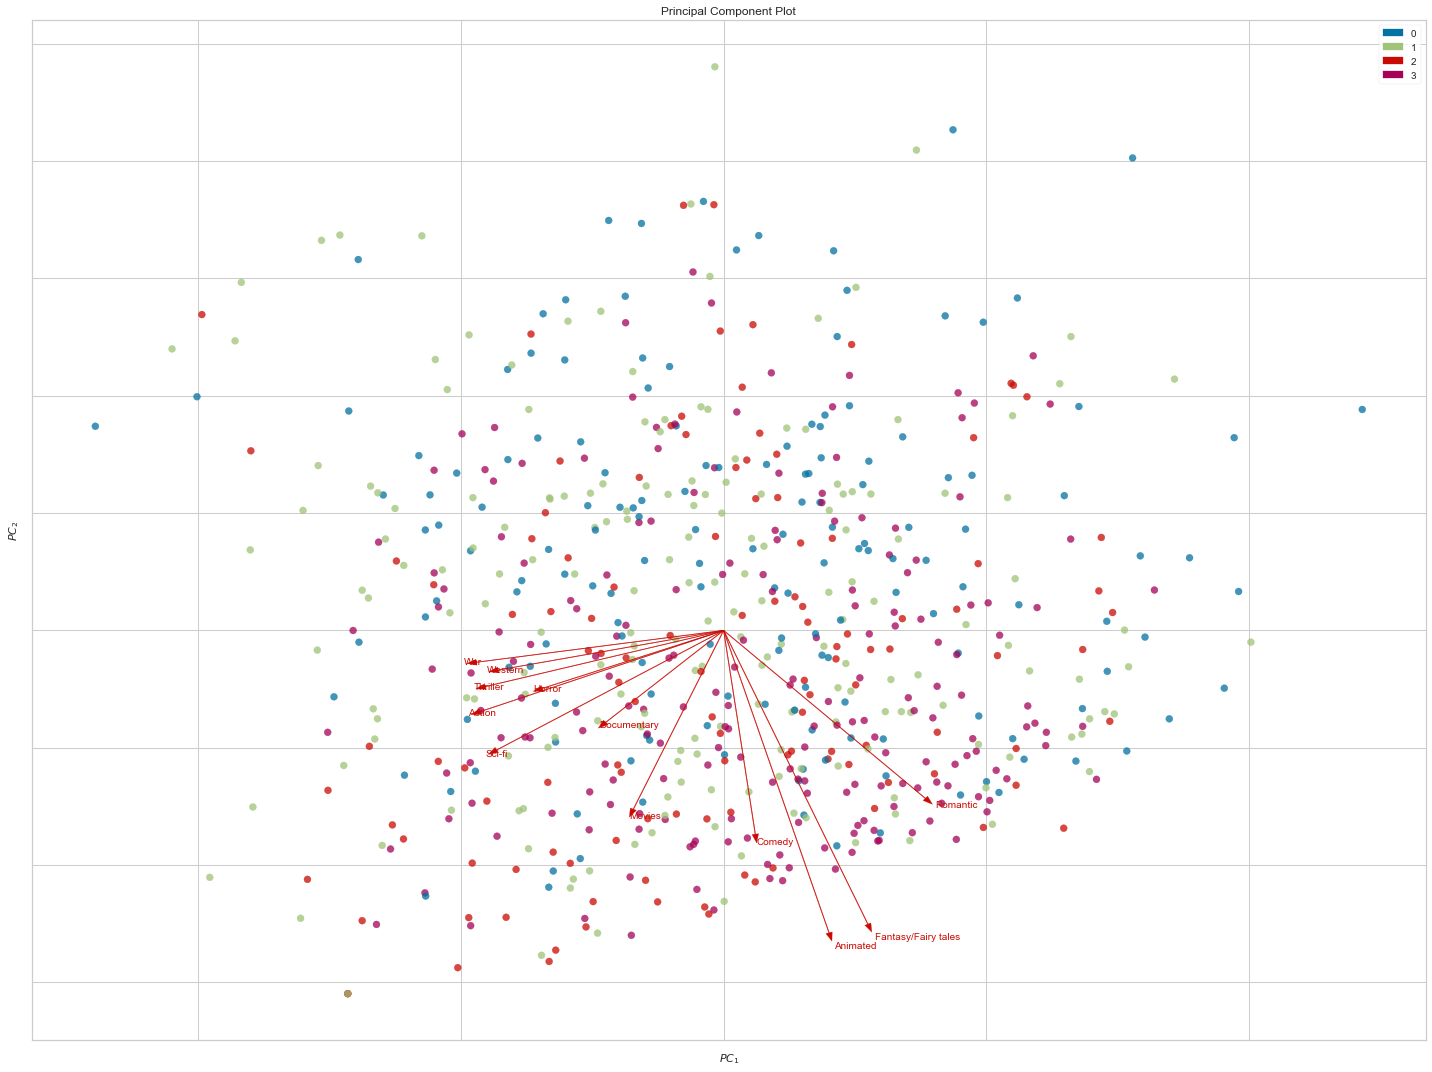

In [283]:
responsed['Label_Movies'] = X.by_kmeans(4)
X.plot_scatter(X.scaler(responsed_movies), 10, responsed['Label_Movies'])
X.plot_pc(X.scaler(responsed_movies), responsed_movies, responsed['Label_Movies'])

# Clustering Music and Movies

In [28]:
responsed_movmus = responsed.loc[:,:'Action']

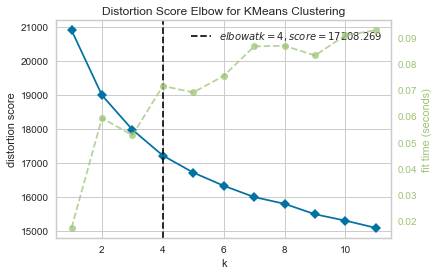

In [29]:
X = ClusterKmeans(responsed_movmus)
X.plot_elbow(X.scaler(responsed_movmus))

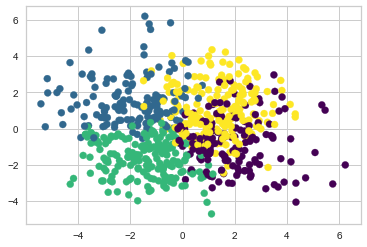

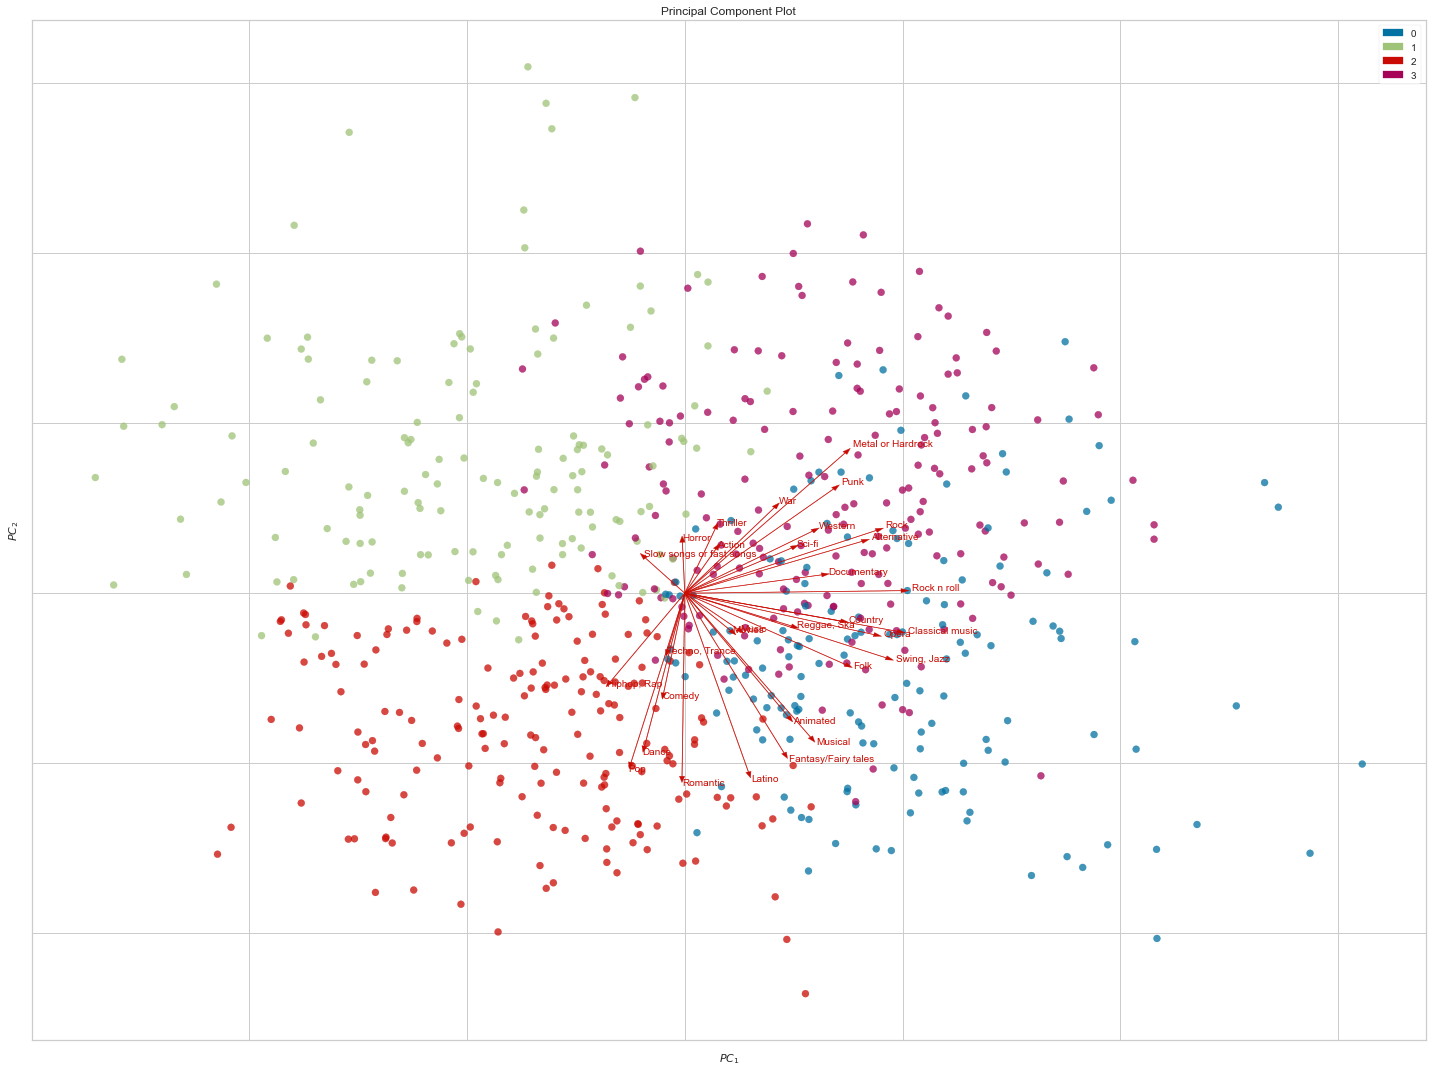

In [31]:
responsed['Label_MusicAndMovies'] = X.by_kmeans(4, X.scaler(responsed_movmus))
X.plot_scatter(X.scaler(responsed_movmus), 10, responsed['Label_MusicAndMovies'])
X.plot_pc(X.scaler(responsed_movmus), responsed_movmus, responsed['Label_MusicAndMovies'])

# Clustering by Cult and Superficials

In [115]:
responsed_cusu = responsed[['Music', 'Movies', 'Mathematics', 'Writing', 'Reading', 'Foreign languages', 'Art exhibitions', 'Theatre', 'Celebrities', 'Shopping', 'Fun with friends', 'Friends versus money', 'Empathy', 'Giving', 'Charity', 'Age']]

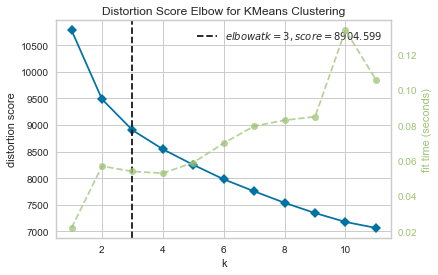

In [286]:
X = ClusterKmeans(responsed_cusu)
X.plot_elbow(X.scaler(responsed_cusu))

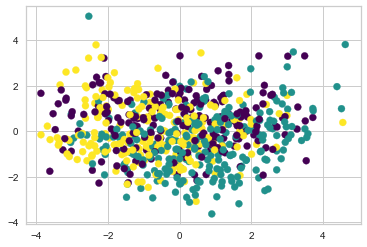

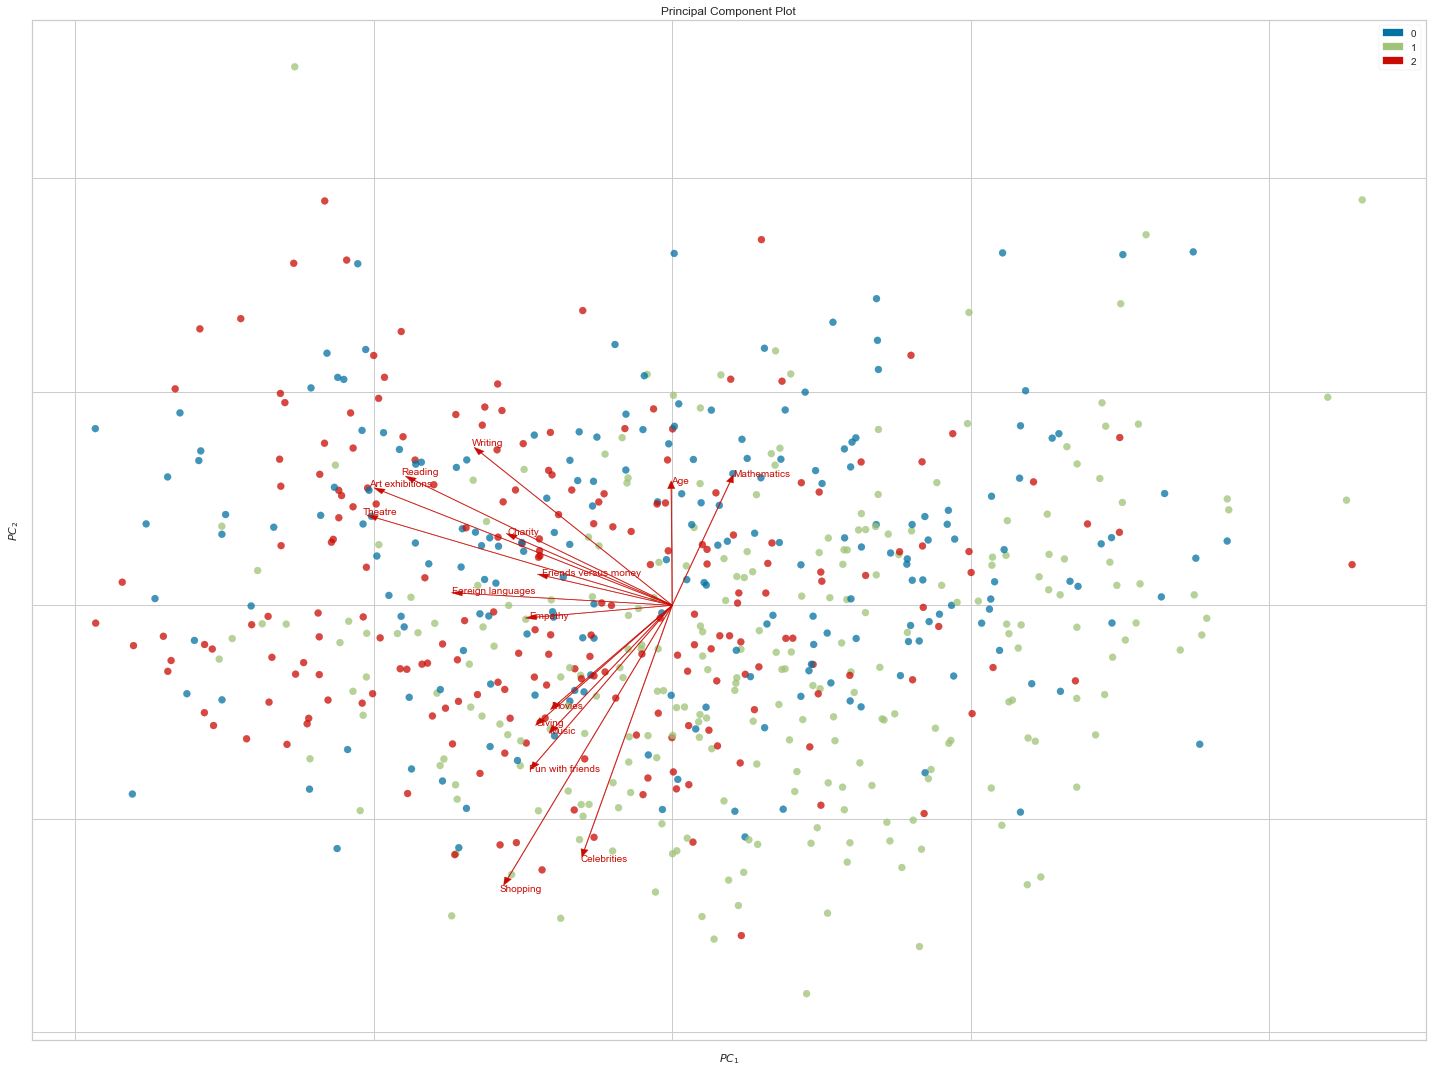

In [287]:
responsed['Label_CultAndSuperf'] = X.by_kmeans(3)
X.plot_scatter(X.scaler(responsed_cusu), 10, responsed['Label_CultAndSuperf'])
X.plot_pc(X.scaler(responsed_cusu), responsed_cusu, responsed['Label_CultAndSuperf'])

# Clustering by all variables

In [292]:
responsed.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0

In [293]:
dummy_Alcohol = pd.get_dummies(responsed['Alcohol'], drop_first = True)
responsed = pd.concat([responsed, dummy_Alcohol], axis=1)
responsed = responsed.drop('Alcohol', axis=1)

In [294]:
dummy_Lying = pd.get_dummies(responsed['Lying'], drop_first = True)
responsed = pd.concat([responsed, dummy_Lying], axis=1)
responsed = responsed.drop('Lying', axis=1)

In [295]:
dummy_Internet = pd.get_dummies(responsed['Internet usage'], drop_first = True)
responsed = pd.concat([responsed, dummy_Internet], axis=1)
responsed = responsed.drop('Internet usage', axis=1)

In [296]:
dummy_Punctuality = pd.get_dummies(responsed['Punctuality'], drop_first = True)
responsed = pd.concat([responsed, dummy_Punctuality], axis=1)
responsed = responsed.drop('Punctuality', axis=1)

In [297]:
dummy_Smoking = pd.get_dummies(responsed['Smoking'], drop_first = True)
responsed = pd.concat([responsed, dummy_Smoking], axis=1)
responsed = responsed.drop('Smoking', axis=1)
responsed.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,never,social drinker,never,only to avoid hurting someone,sometimes,less than an hour a day,most of the day,i am often early,i am often running late,former smoker,never smoked,tried smoking
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,0,0,1,0,0,0,0,0,0,0,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,0,0,0,0,1,0,0,1,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats,0,0,0,0,1,0,0,0,1,0,0,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.

In [298]:
responsed_all = responsed.loc[:, :'Number of siblings']

In [173]:
scaler = StandardScaler()
scalered_all = scaler.fit_transform(responsed_all)

In [174]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(scalered_all)
labels = db.fit_predict(scalered_all)

In [220]:
db = DBSCAN(eps=0.5, min_samples=5)
customers_db = db.fit(scalered_all)
responsed['Labels_ALL_DBSCAN'] = customers_db.labels_

In [219]:
responsed['Labels_ALL_DBSCAN'].value_counts()

-1    674
Name: Labels_ALL_DBSCAN, dtype: int64

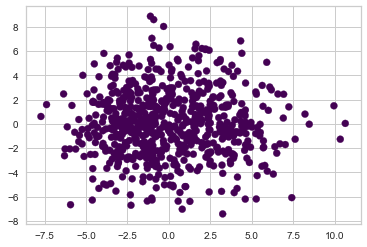

In [217]:
pc1 = pca.transform(scalered_all)[:,0]
pc2 = pca.transform(scalered_all)[:,1]
plt.scatter(pc1, pc2, c=responsed['Labels_ALL_DBSCAN'], cmap = 'viridis')